In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
d = {'id': [1, 2, 3], 'name': ["Nahuel", "Ulises", "Celeste"]}
user = pd.DataFrame(data=d)

In [17]:
user

,id,name
0,1,Nahuel
1,2,Ulises
2,3,Celeste


In [18]:
d = {'id': [1, 2, 5], 'name': ["nlcostamagna@gmail.com", "uconstamagna@gmai.com", "acostamagna@gmail.com"]}
address = pd.DataFrame(data=d)

In [19]:
address

,id,name
0,1,nlcostamagna@gmail.com
1,2,uconstamagna@gmai.com
2,5,acostamagna@gmail.com


In [20]:
pd.merge(user, address, on=["id", "id"])

,id,name_x,name_y
0,1,Nahuel,nlcostamagna@gmail.com
1,2,Ulises,uconstamagna@gmai.com


In [22]:
pd.merge(user, address, how="left", on=["id", "id"])

,id,name_x,name_y
0,1,Nahuel,nlcostamagna@gmail.com
1,2,Ulises,uconstamagna@gmai.com
2,3,Celeste,NaN


In [24]:
pd.merge(user, address, how="right", on=["id", "id"])

,id,name_x,name_y
0,1,Nahuel,nlcostamagna@gmail.com
1,2,Ulises,uconstamagna@gmai.com
2,5,NaN,acostamagna@gmail.com


In [27]:
pd.merge(user, address, how="outer", on=["id", "id"])

,id,name_x,name_y
0,1,Nahuel,nlcostamagna@gmail.com
1,2,Ulises,uconstamagna@gmai.com
2,3,Celeste,NaN
3,5,NaN,acostamagna@gmail.com


# Dolar Analitic

In [2]:
!pip install matplotlib

In [11]:
dolar = pd.read_csv("datasets/USD-ARG 08-2011_08-2021.csv")
dolar

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,08.09.2021,"98,0150","97,9080","98,0400","97,9080","0,24%"
1,07.09.2021,"97,7850","97,8625","98,0250","97,8625","-0,16%"
2,06.09.2021,"97,9400","97,9400","97,9850","97,9100","0,07%"
3,03.09.2021,"97,8700","97,8800","97,8850","97,8550","0,04%"
4,02.09.2021,"97,8300","97,7230","97,8550","97,7130","0,24%"
...,...,...,...,...,...,...
2630,05.08.2011,"4,1555","4,1470","4,1585","4,1430","0,18%"
2631,04.08.2011,"4,1480","4,1470","4,1550","4,1470","0,00%"
2632,03.08.2011,"4,1480","4,1470","4,1550","4,1420","0,04%"
2633,02.08.2011,"4,1465","4,1310","4,1515","4,1310","0,35%"


In [12]:
dolar['Fecha'] =  pd.to_datetime(dolar['Fecha'], format='%d.%m.%Y')

dolar['day'] = (dolar['Fecha'] - dolar['Fecha'][len(dolar) -1]).dt.days
dolar['moneda'] = dolar['Último'].str.replace(',','.').astype(float)

# dolar['Fecha'] = [int(x.split('.')[2]) + int(x.split('.')[1]) +
#                   int(x.split('.')[0]) for x in dolar['Fecha']]
dolar["president"] = ""

In [13]:
# dolar.loc[(dolar.day < 2) | (dolar.day > 2000), "president"] = "lala"

dolar.loc[(dolar.Fecha <= '2015-12-09'), "president"] = "Cristina"
dolar.loc[(dolar.Fecha > '2015-12-09') & (dolar.Fecha <= '2019-12-10'), "president"] = "Macri"
dolar.loc[(dolar.Fecha > '2019-12-10'), "president"] = "Alberto"

In [14]:
dolar

,Fecha,Último,Apertura,Máximo,Mínimo,% var.,day,moneda,president
0,2021-09-08,"98,0150","97,9080","98,0400","97,9080","0,24%",3691,98.0150,Alberto
1,2021-09-07,"97,7850","97,8625","98,0250","97,8625","-0,16%",3690,97.7850,Alberto
2,2021-09-06,"97,9400","97,9400","97,9850","97,9100","0,07%",3689,97.9400,Alberto
3,2021-09-03,"97,8700","97,8800","97,8850","97,8550","0,04%",3686,97.8700,Alberto
4,2021-09-02,"97,8300","97,7230","97,8550","97,7130","0,24%",3685,97.8300,Alberto
...,...,...,...,...,...,...,...,...,...
2630,2011-08-05,"4,1555","4,1470","4,1585","4,1430","0,18%",4,4.1555,Cristina
2631,2011-08-04,"4,1480","4,1470","4,1550","4,1470","0,00%",3,4.1480,Cristina
2632,2011-08-03,"4,1480","4,1470","4,1550","4,1420","0,04%",2,4.1480,Cristina
2633,2011-08-02,"4,1465","4,1310","4,1515","4,1310","0,35%",1,4.1465,Cristina


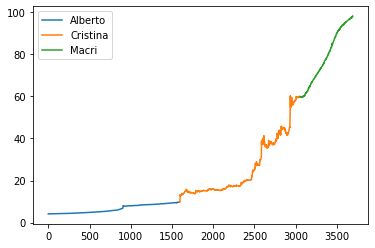

In [19]:
#dolar.plot.line(x='day', y='moneda').line(1,1)
p1 = dolar.loc[dolar.president == "Cristina"]
p2 = dolar.loc[dolar.president == "Macri"]
p3 = dolar.loc[dolar.president == "Alberto"]
plt.plot(p1['day'], p1['moneda'])
plt.plot(p2['day'], p2['moneda'])
plt.plot(p3['day'], p3['moneda'])
plt.legend({'Cristina','Macri', 'Alberto'},loc='upper left')
plt.show()

/tmp/ipykernel_1329214/1430956041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3['day'] = p3['day'] - p2['day'].max()
/tmp/ipykernel_1329214/1430956041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2['day'] = p2['day'] - p1['day'].max()
/tmp/ipykernel_1329214/1430956041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

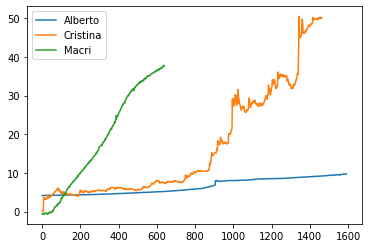

In [16]:

p3['day'] = p3['day'] - p2['day'].max()
p2['day'] = p2['day'] - p1['day'].max()

p3['moneda'] = p3['moneda'] - p2['moneda'].max()
p2['moneda'] = p2['moneda'] - p1['moneda'].max()

plt.plot(p1['day'], p1['moneda'])
plt.plot(p2['day'], p2['moneda'])
plt.plot(p3['day'], p3['moneda'])
plt.legend({'Cristina','Macri', 'Alberto'},loc='upper left')
plt.show()

In [215]:
dolar

,Fecha,Último,Apertura,Máximo,Mínimo,% var.,day,moneda,president
0,2021-09-08,"98,0150","97,9080","98,0400","97,9080","0,24%",3691,98.0150,Alberto
1,2021-09-07,"97,7850","97,8625","98,0250","97,8625","-0,16%",3690,97.7850,Alberto
2,2021-09-06,"97,9400","97,9400","97,9850","97,9100","0,07%",3689,97.9400,Alberto
3,2021-09-03,"97,8700","97,8800","97,8850","97,8550","0,04%",3686,97.8700,Alberto
4,2021-09-02,"97,8300","97,7230","97,8550","97,7130","0,24%",3685,97.8300,Alberto
...,...,...,...,...,...,...,...,...,...
2630,2011-08-05,"4,1555","4,1470","4,1585","4,1430","0,18%",4,4.1555,Cristina
2631,2011-08-04,"4,1480","4,1470","4,1550","4,1470","0,00%",3,4.1480,Cristina
2632,2011-08-03,"4,1480","4,1470","4,1550","4,1420","0,04%",2,4.1480,Cristina
2633,2011-08-02,"4,1465","4,1310","4,1515","4,1310","0,35%",1,4.1465,Cristina
